[Sklearn Time-Related feature engineering](https://scikit-learn.org/stable/auto_examples/applications/plot_cyclical_feature_engineering.html)

In [ ]:
from datetime import datetime
from graph_traffic.config import project_path
from graph_traffic.regression import get_combinations, try_combinations
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
import matplotlib as mpl
mpl.rcParams['axes.grid'] = False

training_datetime = datetime.now().strftime("%Y%m%d_%H%M%S")
training_folder = f"{project_path}/training_history/regression"

pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("RidgeRegression", RidgeCV())
])

data_dict = dict(
    ids_list=[1001],
    seq_len=24*4,
    with_graph=False,
    from_date="2019-01-01",
    to_date="2021-12-31",
    dataset_name="small",
    target="ocupacion",
    interactions="drop"
)

meteo_dict = dict()
meteo_possible = dict(
    rain=["one_hot", "ordinal", "numerico_power", "numerico_quantile_uniform", "numerico_quantile_normal", "drop", "passthrough"],
    wind=["xy", "wind_speed", "drop"],
    temperature=["passthrough", "drop"],
    humidity=["passthrough", "drop"],
    pressure=["passthrough", "drop"],
    radiation=["passthrough", "drop"]
)

temporal_dict = dict()
temporal_possible= dict(
    year=["passthrough", "drop", "one_hot"],
    season=["one_hot", "ordinal", "drop"],
    month=["passthrough", "one_hot", "fourier", "spline", "drop"],
    day_of_month=["passthrough", "one_hot", "fourier", "spline", "drop"],
    weekday=["passthrough", "one_hot", "drop"],
    hour=["passthrough", "one_hot", "fourier", "spline", "drop"],
    minute=["passthrough", "drop", "one_hot"],
    bank_holiday=["passthrough", "drop"],
    school_holiday=["passthrough", "drop"],
    working_day=["passthrough", "drop"],
    state_of_alarm=["passthrough", "drop"]
)

meteo_combinations = get_combinations(meteo_possible)
temporal_combinations = get_combinations(temporal_possible)[::500]

print(f"total of {len(meteo_combinations)} combinations of meteorological transformations")
print(f"total of {len(temporal_combinations)} combinations of temporal transformations")

try_combinations(data_dict, meteo_combinations, temporal_combinations, pipeline)

C:\Users\Bened\PycharmProjects\madrid-traffic\env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


total of 336 combinations of meteorological transformations
total of 324 combinations of temporal transformations

0
323
1
323
2
323
3
323
4
323
5
323
6
323
7
323
8
323
9
323
10
323
11
323
12
323
13
323
14
323
15
323
16
323
17
323
18
323
19
323
20
323
21
323
22
323
23
323
24
323
25
323
26
323
27
323
28
323
29
323
30
323
31
323
32
323
33
323
34
323
35
323
36
323
37
323
38
323
39
323
40
323
41
323
42
323
43
323
44
323
45
323
46
323
47
323
48
323
49
323
50
323
51
323
52
323
53
323
54
323
55
323
56
323
57
323
58
323
59
323
60
323
61
323
62
323
63
323
64
323
65
323
66
323
67
323
68
323
69
323
70
323
71
323
72
323
73
323
74
323
75
323
76
323
77
323
78
323
79
323
80
323
81
323
82
323
83
323
84
323
85
323
86
323
87
323
88
323
89
323
90
323
91
323
92
323
93
323
94
323
95
323
96
323
97
323
98
323
99
323
100
323
101
323
102
323
103
323
104
323
105
323
106
323
107
323
108
323
109
323
110
323
111
323
112
323
113
323
114
323
115
323
116
323
117
323
118
323
119
323
120
323
121
323
122
323
123
323
124

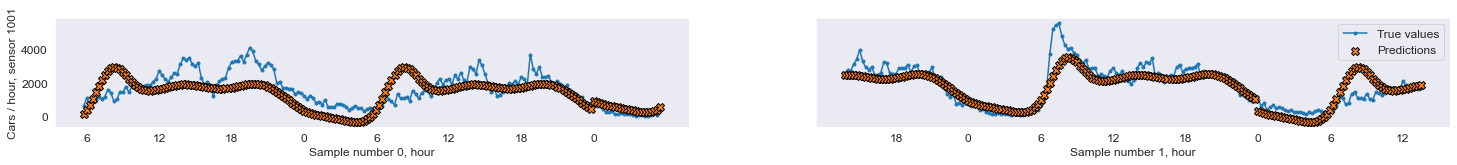

In [10]:
plot_predictions_from_features(estimators, test_x, test_y, random_samples, data_dict["ids_list"], data_dict["seq_len"], features_from_index=features_from_index)

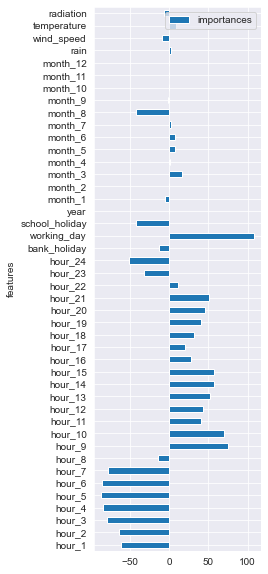

In [7]:
coefs = pipeline[-1].coef_
fig, ax = plt.subplots(figsize=(3, 10))
pd.DataFrame(zip(coefs, column_names[features_from_index:])).rename(columns={0: "importances", 1: "features"}).plot.barh(x=1, ax=ax)
plt.show()